In [52]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv("0000000000002429_training_titanic_x_y_train.csv")

In [6]:
train.drop("Name",inplace=True,axis=1)

In [30]:
train.drop("Cabin",inplace=True,axis=1)
sns.heatmap(train.isnull(),cmap='viridis')

KeyError: "['Cabin'] not found in axis"

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,2,female,29.0,1,0,228414,26.0000,S,1
1,3,male,NaN,0,0,A/5 2466,8.0500,S,0
2,2,male,39.0,0,0,250655,26.0000,S,0
3,3,female,29.0,0,4,349909,21.0750,S,0
4,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,S,0
...,...,...,...,...,...,...,...,...,...
663,2,female,17.0,0,0,SO/C 14885,10.5000,S,1
664,3,male,NaN,0,0,372622,7.7500,Q,0
665,3,male,32.0,0,0,1601,56.4958,S,1
666,3,female,22.0,0,0,7553,9.8375,S,0


In [25]:
train["Age"].groupby(train["Pclass"]).mean()

Pclass
1    37.126232
2    29.549493
3    25.839423
Name: Age, dtype: float64

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [29]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

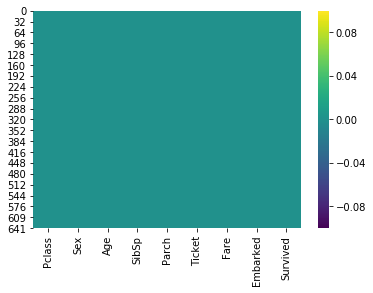

In [34]:
sns.heatmap(train.isnull(),cmap='viridis')

In [33]:
train.dropna(inplace=True)

In [38]:
train["Sex"]=pd.get_dummies(train["Sex"],drop_first=True)

In [41]:
train=pd.concat([train,pd.get_dummies(train["Embarked"],drop_first=True)],axis=1)

In [43]:
train.drop(["Ticket",'Embarked'],axis=1,inplace=True)

In [45]:
y=train["Survived"]

In [46]:
train.drop("Survived",axis=1,inplace=True)

In [48]:
sca=StandardScaler()

In [49]:
sca.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
train=sca.transform(train)

In [71]:
model=LogisticRegression(max_iter=250)

In [72]:
model.fit(train,y)

e:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
test=pd.read_csv("0000000000002429_test_titanic_x_test.csv")

In [62]:
test["Sex"]=pd.get_dummies(test["Sex"],drop_first=True)
test=pd.concat([test,pd.get_dummies(test["Embarked"],drop_first=True)],axis=1)
test.drop(["Ticket",'Embarked','Cabin','Name'],axis=1,inplace=True)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [64]:
test=sca.transform(test)

In [73]:
pred=model.predict(test)

In [74]:
pred=pd.DataFrame(pred)

In [75]:
pred.to_csv("pred",index=False,header=False)